# Statistical Thinking in Python 1 #

## Chapter 2: Quantitative Exploratory Data Analysis ##

## Introduction to Summary Statistics: The sample mean and median

### Mean ###

In [3]:
import numpy as np
import pandas as pd

votes = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv').values
print(votes)

votes_all = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv').values
print(votes_all)

[['PA' 'Erie County' 127691 75775 50351 60.08]
 ['PA' 'Bradford County' 25787 10306 15057 40.64]
 ['PA' 'Tioga County' 17984 6390 11326 36.07]
 ...
 ['OH' 'Hocking County' 12961 6259 6364 49.58]
 ['OH' 'Licking County' 82356 33932 46918 41.97]
 ['OH' 'Madison County' 17454 6532 10606 38.11]]
[['AK' 'State House District 8, Denali-University' 10320 ... 342 50.06
  'west']
 ['AK' 'State House District 37, Bristol Bay-Aleuti' 4665 ... 136 41.24
  'west']
 ['AK' 'State House District 12, Richardson-Glenn H' 7589 ... 208 25.93
  'west']
 ...
 ['OH' 'Hocking County' 12961 ... 338 49.58 'east']
 ['OH' 'Licking County' 82356 ... 1506 41.97 'east']
 ['OH' 'Madison County' 17454 ... 316 38.11 'east']]


In [2]:
PA = votes[votes[:,0]=='PA']
PA_dem_share = PA[:,5]

np.mean(PA_dem_share)

45.476417910447765

### Median ###

In [5]:
UT = votes_all[votes_all[:,0]=='UT']
UT_dem_share = UT[:,6]

np.median(UT_dem_share)

22.47

## Mean and Median Exercise: ##

In [6]:
iris = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv').values
print(iris)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

In [44]:
versicolor = iris[iris[:,4]=='Iris-versicolor']
versicolor_petal_length = versicolor[:,2]

# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles, Outliers, and Boxplots ##

In [14]:
df_swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [15]:
df_all_states = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv')
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


### Computing Percentiles ###

In [17]:
np.percentile(df_swing['dem_share'],[25,50,70])

array([37.3025, 43.185 , 48.588 ])

### Generating a box plot ###

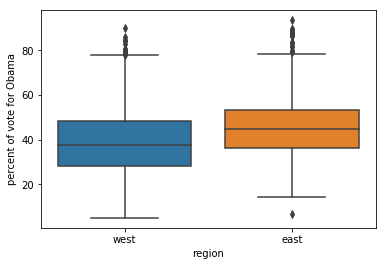

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.boxplot(x='east_west',y='dem_share',data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

## Percentiles, Outliers, Box Plot Exercise: ##

In [21]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3 4.0 4.35 4.6 4.9775]


### Creates ECDF Function ###

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / n

    return x, y

In [24]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

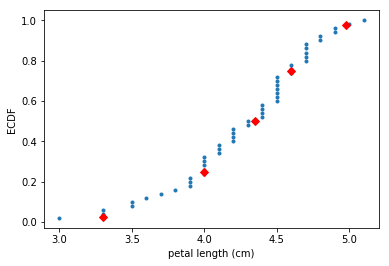

In [25]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

In [28]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
iris_vers = df_iris[df_iris['Name']=='Iris-versicolor']

vers_petal_length = iris_vers['PetalLength']
vers_petal_width = iris_vers['PetalWidth']

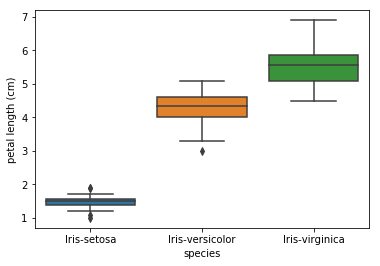

In [30]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Name',y='PetalLength', data=df_iris)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')


# Show the plot
plt.show()

## Variance and Standard Deviation ##

**Variance:**
- The mean squared distance of the data from their mean
- Informally, a measure of the spread of the data

In [33]:
FL = votes[votes[:,0]=='FL']
FL_dem_share = FL[:,5]

np.var(FL_dem_share)

147.44278618846064

In [34]:
np.std(FL_dem_share)

12.142602117687158

In [35]:
np.sqrt(np.var(FL_dem_share))

12.142602117687158

## Variance and Standard Deviation Exercises ##

In [36]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [37]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


## Covariance and the Pearson correlation coefficient ##

### Scatterplot ###

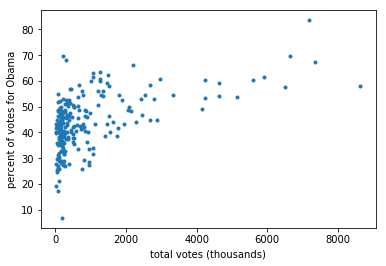

In [41]:
total_votes = df_swing['total_votes']
dem_share = df_swing['dem_share']

_ = plt.plot(total_votes/100,dem_share,marker='.',linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of votes for Obama')

plt.show()

## Covariance and the Pearson correlation coefficient Exercises ##

In [45]:
versicolor_petal_width = versicolor[:,3]
versicolor_petal_width

array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0,
       1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
       1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
       1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3],
      dtype=object)

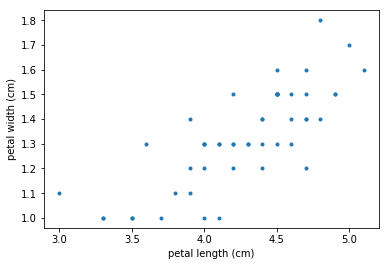

In [46]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.',linestyle='none')


# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

In [56]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(vers_petal_length, vers_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [58]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(vers_petal_length,vers_petal_width)

# Print the result
print(r)

0.7866680885228168
